# Agglomerative Hierarchical Clustering (AHC)
### Dataset : [Dry_Bean_Dataset.csv](../../input/Dry_Bean_Dataset.xlsx)

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


<a id="2"></a>
## Loading dataset

In [2]:
filename = '../../input/Dry_Bean_Dataset.xlsx'
df = pd.read_excel(filename)

print(df.head())

print("Column names:", df.columns.tolist())


features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity']
target = 'Class'

X = df[features].values
y = df[target].values

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

<a id="3"></a>
## Plot function

In [3]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    print("Last 10 merge distances:", linkage_matrix[-10:, 2])
    
    dendrogram(linkage_matrix, **kwargs)

<a id="5"></a>
### AHC - Unweighted average (UPGMA) linkage

Last 10 merge distances: [ 16247.39508491  16628.62590957  16981.71598679  17204.30639773
  27679.49249944  29987.67106148  34459.03775523  43689.36383725
  53333.45482165 125455.34760328]


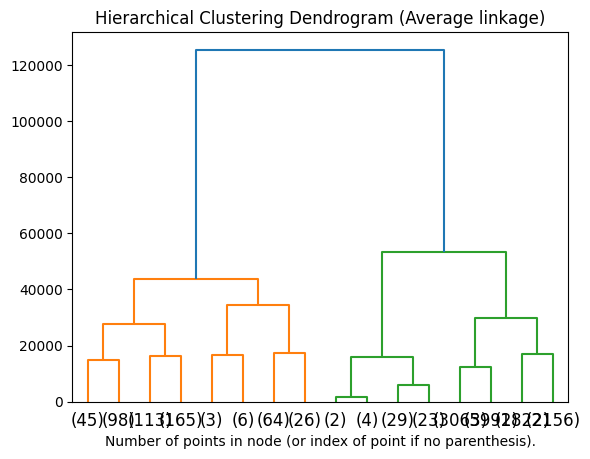

In [4]:
model = AgglomerativeClustering( linkage='average', distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram (Average linkage)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<a id="6"></a>
### AHC - Complete linkage (CL) 

Last 10 merge distances: [ 35835.89409403  35990.59662316  42091.32009579  44721.88495711
  51852.13931176  57989.1278721   69901.84719307  96617.37217995
 128115.0075562  234201.41109251]


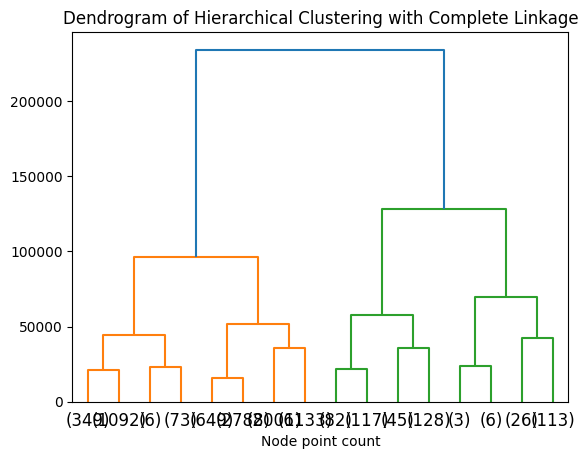

In [5]:
model = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Dendrogram of Hierarchical Clustering with Complete Linkage")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Node point count")
plt.show()